[4512 3738 4261 3777 4177] [1530 1297 1335 1282 1590]
3633.9915611814345 1282.873417721519
0.2634293394893993 325.5734210494428


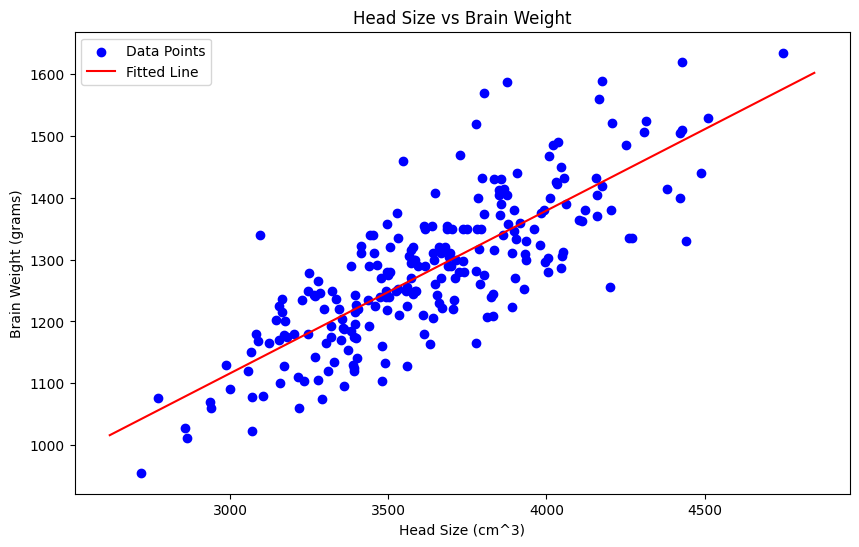

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/headbrain.csv')

x = np.array(data['Head Size(cm^3)'])
y = np.array(data['Brain Weight(grams)'])
print(x[:5], y[:5])

def get_line(x, y):
    x_m, y_m = np.mean(x), np.mean(y)
    print(x_m, y_m)

    x_d, y_d = x - x_m, y - y_m
    m = np.sum(x_d * y_d) / np.sum(x_d ** 2)
    c = y_m - (m * x_m)
    print(m, c)

    return lambda x: m * x + c

lin = get_line(x, y)

X = np.linspace(np.min(x) - 100, np.max(x) + 100, 1000)
Y = lin(X)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(X, Y, color='red', label='Fitted Line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Head Size vs Brain Weight')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the error function
def get_error(line_func, x, y):
    y_m = np.mean(y)
    y_pred = np.array([line_func(val) for val in x])
    ss_t = np.sum((y - y_m) ** 2)
    ss_r = np.sum((y - y_pred) ** 2)
    return 1 - (ss_r / ss_t)

# Assuming lin is defined somewhere as a line function
lin = get_line(x, y)  # Ensure get_line is defined as in your previous code

# Calculate the error
error = get_error(lin, x, y)
print(f"Custom Error: {error}")

# Reshape x for sklearn
x = x.reshape(-1, 1)

# Linear Regression model
reg = LinearRegression()
reg.fit(x, y)

# Print the R^2 score
print(f"Sklearn R^2 Score: {reg.score(x, y)}")


3633.9915611814345 1282.873417721519
1.626833865809982e-16 1282.8734177215183
Custom Error: -235.99999999999997
Sklearn R^2 Score: 0.639311719957
Intercept: 325.5734210494426
Slope: 0.26342933948939934
